<a href="https://colab.research.google.com/github/Avigail-Spira/CS-381/blob/main/A_Spira_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####This data is from Pima Indian Diabetes 
It has 768 record, 9 attributes, 268 positive diabetes results and 500 negative. All patients were female, over 21, and of Pima Indian heritage. 

In [ ]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Data initialization
df = pd.read_csv('https://raw.githubusercontent.com/Avigail-Spira/CS-381/main/diabetes.csv')
df_copy = df.copy()


##Data Summary

In [ ]:
#print sample of the data
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Attributes**:
1. Pregnancies - number of times pregnant
2. Glucose - plasma glucose concentration at 2 hours in an oral glucose tolerance test. Glucose is the main sugar found in the body and it is the body's main source of energy. Glucose is a monosaccharide, one sugar. When we eat, the pancreas produces insulin to deal with glucose. One way diabetes happens is when the pancreas does not create insulin properly. Normal glucose levels are anything below 140 mg/dL. More information on glucose [here]('https://www.healthline.com/health/glucose#how-glucose-works').
3. Blood Pressure - diastolic blood pressure is the pressure the blood exerts on artery walls in between heart beats. Normal diastolic blood pressure is anything less than 80 mm Hg. High blood pressure would be between 80-89 mmHg. Hypertension is above 90 and Hypertensive crisis is above 120. More information on blood pressure [here]('https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings').
4. Skin Thickness - triceps skin fold thickness (mm). "The triceps skinfold is necessary for calculating the upper arm muscle circumference. Its thickness gives information about the fat reserves of the body, whereas the calculated muscle mass gives information about the protein reserves." From [here]('https://nutritionalassessment.mumc.nl/en/skinfold-measurements'). This is the most reliable of all skinfold measurements and fairly reliable. It is used to assess body fat. Thick skinnes has been linked to a type of diabetes and insulin levels. 
5. Insulin - 2 Hour serum insulin. Insulin is a hormone found in our bodies which regulates the amount of glucose in our bloodstream. Insulin is produced by the pancreas. When someone has diabetes either their body does not make insulin or it makes insulin but does not produce enough. From [here]('https://www.endocrineweb.com/conditions/type-1-diabetes/what-insulin')
6. BMI - body mass index (wright in kg/ (height in mm)^2). It is a measure that uses your height and weight to work out if your weight is healthy. For adults, an ideal BMI is in the 18.5 to 24.9 range. See [here]('https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/#:~:text=The%20body%20mass%20index%20(BMI)%20is%20a%20measure%20that%20uses,of%2025%20means%2025kg%2Fm2.')
7. Diabetes Pedigree Function - indicates the function which scores likelihood of diabetes based on family history. 
8. Age - in years
9. Outcome - 0 or 1. 1 means the person has diabetes. 

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##EDA

In [ ]:
#check how many values are null
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null values

In [ ]:
# show dataset summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 - The mean of glucose is 120 which is above normal/average glucose levels which is 90-110 but this makes sense as many of the women in the dataset have diabetes. A glucose level of 0 does not seem to make sense but the minimum value is 0. 
 - The minimum values of 0 in glucose, blood pressure, skin thickness, insulin, and BMI are probably null values because it does not make sense for a person to have such low levels. 
 - The ages of the patients span from 21 until 81 (a 60 year range). The mean age is 33.
 - About 35% of the women have diabetes. 

In [ ]:
corr = df.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

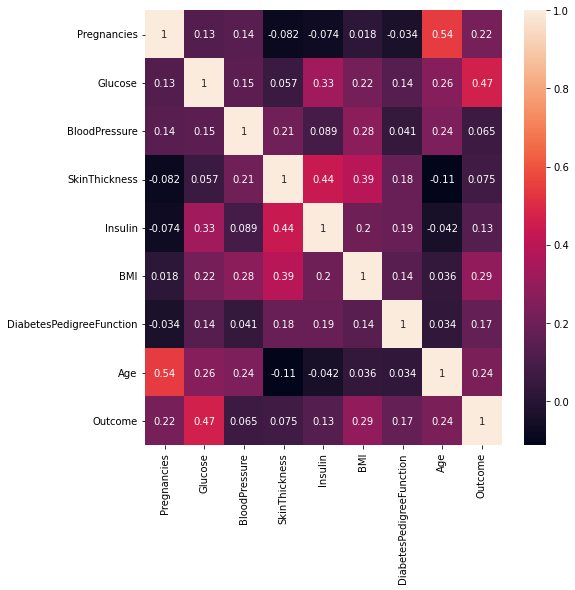

In [ ]:
# view correlation matrix for the variables in the dataset
corrMatrix = df.corr()

# show visual representation
plt.rcParams.update({'font.size': 10,'figure.figsize':(8,8)})
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show() 

There seems to be a high correlation between age and pregnancies which makes sense. Glucose is also highly correlated with Outcome with also makes sense because glucose levels has a lot to do with if someone has diabetes. 

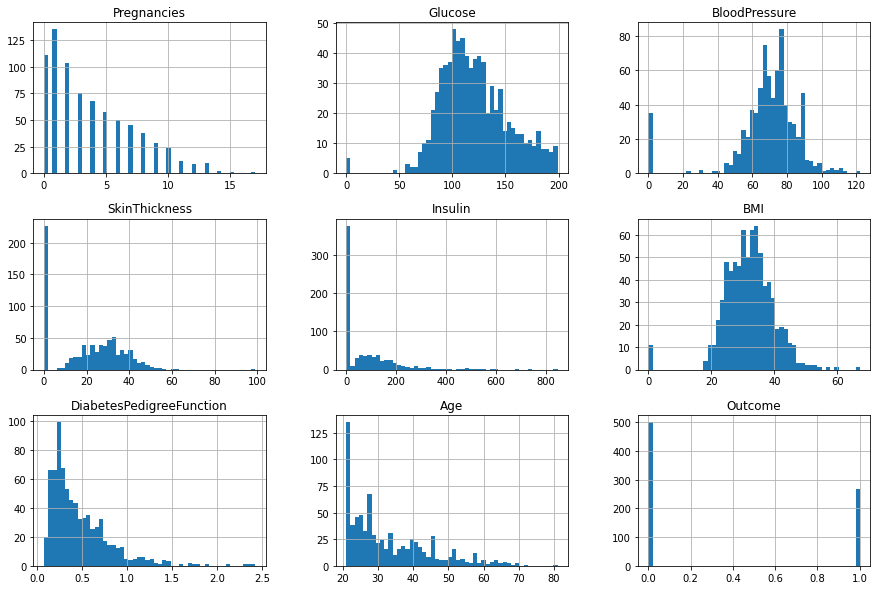

In [ ]:
#histograms
df.hist(bins=50, figsize=(15,10))
plt.show()

- Most people have fewer children with single child being the most common. 
- The zero values should be replaced by the mean of people who have diabetes or who don't have diabetes. 
-Most women under study are younger ages. 

Highlight contrasts

In [ ]:
print(df['DiabetesPedigreeFunction'].max())
df['DiabetesPedigreeFunction'].max() - df['DiabetesPedigreeFunction'].min()


2.42


2.342

In [ ]:
#Make subset of diabetic and non diabetic patients
diabetic = df[df['Outcome'] ==1]
non_diabetic = df[df['Outcome'] == 0]

In [ ]:
 import math
 #Replace the zero values by the mean of that attribute of someone with diabetes vs. without diabetes
 #Glucose
 df['Glucose'] = np.where((df['Glucose'] == 0) & (df['Outcome'] == 1), math.trunc(diabetic['Glucose'].mean()), df['Glucose'])
 df['Glucose'] = np.where((df['Glucose'] == 0) & (df['Outcome'] == 0), math.trunc(non_diabetic['Glucose'].mean()), df['Glucose'])

#Blood Pressure
df['BloodPressure'] = np.where((df['BloodPressure'] == 0) & (df['Outcome'] == 1), math.trunc(diabetic['BloodPressure'].mean()), df['BloodPressure'])
df['BloodPressure'] = np.where((df['BloodPressure'] == 0) & (df['Outcome'] == 0), math.trunc(non_diabetic['BloodPressure'].mean()), df['BloodPressure'])

#Skin Thickness
df['SkinThickness'] = np.where((df['SkinThickness'] == 0) & (df['Outcome'] == 1), math.trunc(diabetic['SkinThickness'].mean()), df['SkinThickness'])
df['SkinThickness'] = np.where((df['SkinThickness'] == 0) & (df['Outcome'] == 0), math.trunc(non_diabetic['SkinThickness'].mean()), df['SkinThickness'])

#Insulin
df['Insulin'] = np.where((df['Insulin'] == 0) & (df['Outcome'] == 1), math.trunc(diabetic['Insulin'].mean()), df['Insulin'])
df['Insulin'] = np.where((df['Insulin'] == 0) & (df['Outcome'] == 0), math.trunc(non_diabetic['Insulin'].mean()), df['Insulin'])


#BMI
df['BMI'] = np.where((df['BMI'] == 0) & (df['Outcome'] == 1), math.trunc(diabetic['BMI'].mean()), df['BMI'])
df['BMI'] = np.where((df['BMI'] == 0) & (df['Outcome'] == 0), math.trunc(non_diabetic['BMI'].mean()), df['BMI'])

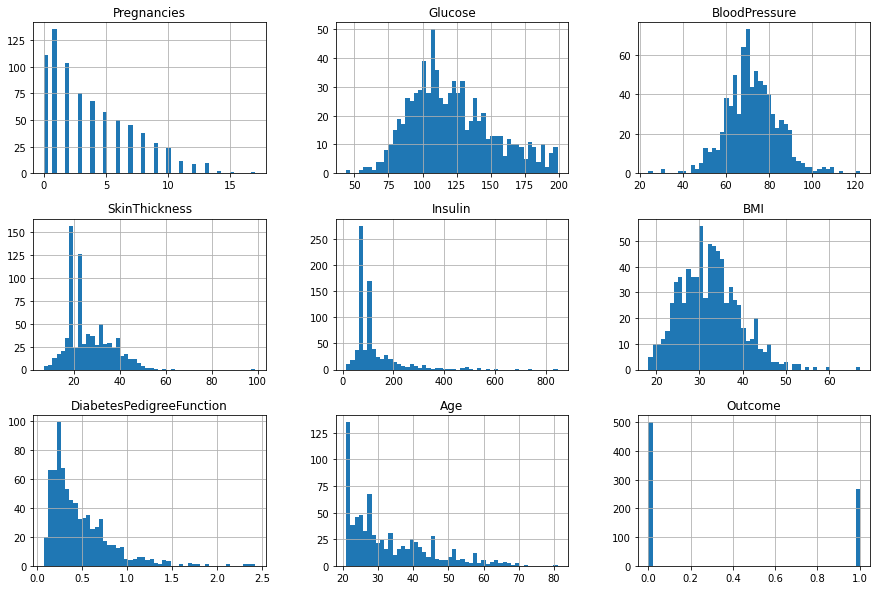

In [ ]:
df.hist(bins=50, figsize=(15,10))
plt.show()

Histograms are fixed now and don't have all the zero values.

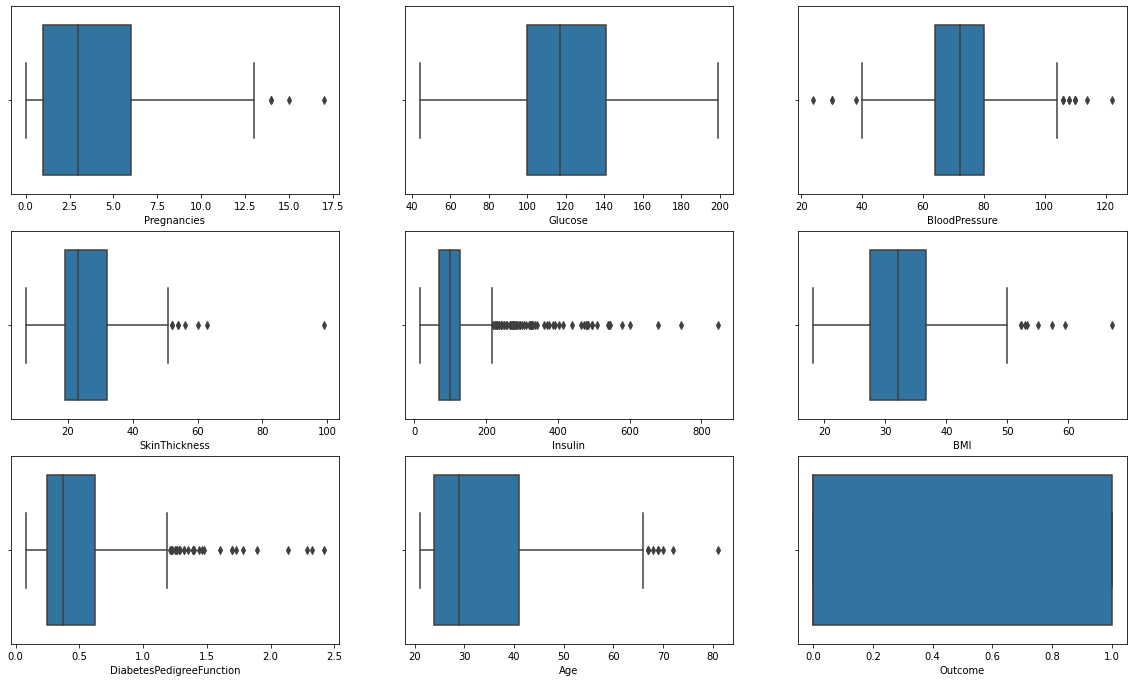

In [ ]:
plt.figure(figsize=(20,20))

#use an index to identify the spot of the subplot
j=1
columns=df.columns.tolist()
for k in columns:   
    plt.subplot(5,3,j) 
    sns.boxplot(x=k,data=df)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show()

The boxplots are not surprising from the data. There are a lot of outliers which is also not surprising because these attributes can vary a lot from patient to patient especially since there are many diabetic patients in this data set. 

Disect Factors

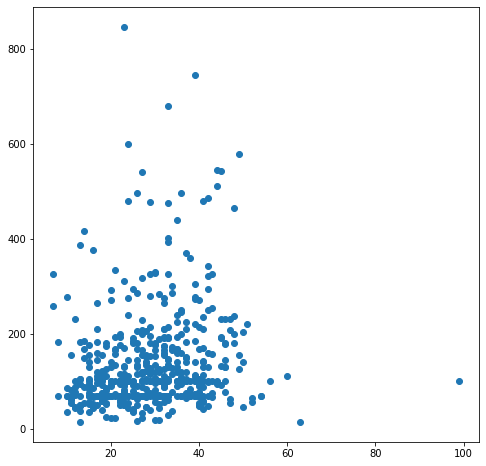

In [ ]:
plt.scatter(df['SkinThickness'], df['Insulin'])

There is high correlation between skin thickness and insulin which agrees with our domain knowledge because we learnt that thicker skin is characteristic of someone with diabetes.

Text(0.5, 1.0, 'Non Diabetics')

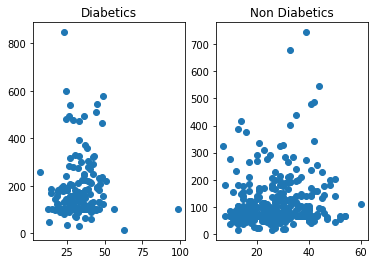

In [ ]:
diabetic = df[df['Outcome'] ==1]
non_diabetic = df[df['Outcome'] == 0]


plt.subplot(121)
plt.scatter(diabetic['SkinThickness'], diabetic['Insulin'])
plt.title('Diabetics')
plt.subplot(122)
plt.scatter(non_diabetic['SkinThickness'], non_diabetic['Insulin'])
plt.title('Non Diabetics')


Here we see the difference of the effect of insulin on skin thickness between diabetic and non diabetics. 

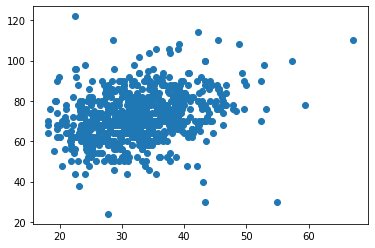

In [ ]:
plt.scatter(df['BMI'], df['BloodPressure'])

The higher the BMI the higher the blood pressure. This makes sense because high blood pressure is very linked to obesity. And the higher BMIs are on the scale of obesity.

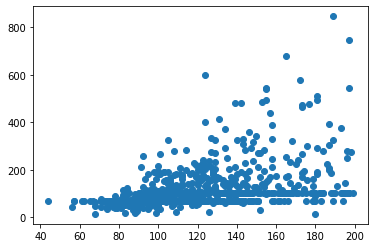

In [ ]:
plt.scatter(df['Glucose'], df['Insulin'])

It makes sense that the more glucose the more insulin because when there is more glucose in the blood, the pancreas creates more insulin to get the glucose levels under control. 

Start Small and Zoom Out
   - Focusing on age of diabetic patients

In [ ]:
ages = df.loc[df["Outcome"] == 1, "Age"]
print(ages.mean())
print(ages)
print(ages.max())

37.06716417910448
0      50
2      32
4      33
6      26
8      53
       ..
755    37
757    52
759    66
761    43
766    47
Name: Age, Length: 268, dtype: int64
70


In [ ]:
ages2 = df.loc[df["Outcome"] == 0, "Age"]
print(ages2.mean())
print(ages2)
print(ages2.max())

31.19
1      31
3      21
5      30
7      29
10     30
       ..
762    33
763    63
764    27
765    30
767    23
Name: Age, Length: 500, dtype: int64
81


Age does not seem to be such an influential factor on getting diabetes. The mean of both of them is similar and the eldest patient actually does not have diabetes.

##Logistic Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

In [ ]:
## Data 
X = df.to_numpy()
n = len(X)

## One-liner
model = LinearRegression().fit(np.arange(n).reshape((n,1)), X)

## Result
classification = model.predict([[9]])
print(classification)

[[  4.05665947 121.46504413  71.65713582  26.19082335 119.3271542
   32.47375219   0.49443151  33.08775169   0.3853382 ]]


In [ ]:
df.mean()

Pregnancies                   3.845052
Glucose                     121.687500
BloodPressure                72.246094
SkinThickness                26.496094
Insulin                     118.664062
BMI                          32.435286
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

The classification vector from the linear regression has very similar values to the mean values. 

In [ ]:
#insulin predicting diabetes
model = LogisticRegression().fit(X[:,4].reshape(-1,1), X[:,8])

## Result
print(model.predict([[400],[350],[250],[220],[215]]))

[1. 1. 1. 1. 0.]


This does not seem to pick up the insulin levels which would indicate diabetes.

In [ ]:
#Glucose predicting diabetes
model = LogisticRegression().fit(X[:,1].reshape(-1,1), X[:,8])

## Result 
print(model.predict([[10],[100],[140],[150],[200]]))

[0. 0. 0. 1. 1.]


Agrees with the idea that glucose levels above 140 are not normal and probably are indicative of diabetes. 

In [ ]:
#find the center of each cluster
kmeans = KMeans(n_clusters=2).fit(X)


## Result & puzzle
cc = kmeans.cluster_centers_
print(cc)

[[3.95714286e+00 1.53785714e+02 7.38857143e+01 3.21000000e+01
  3.57657143e+02 3.59314286e+01 5.84871429e-01 3.40714286e+01
  5.42857143e-01]
 [3.83381089e+00 1.18468481e+02 7.20816619e+01 2.59340974e+01
  9.46962751e+01 3.20846705e+01 4.60544413e-01 3.31575931e+01
  3.29512894e-01]]


In [ ]:
KNN = KNeighborsRegressor(n_neighbors=3).fit(X[:,0].reshape(-1,1), X[:,1])


## Result & puzzle
res = KNN.predict([[30]])
print(res)

[158.]


##Metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Precision

In [ ]:
precision = diabetic.shape[0] / (.3853382 * 768 )
precision

0.9055897736931696

Precision = the amount of people who actually have diabetes / TP+FP which is the people who have diabetes + the people who do not but still got a positive result. 

The people actually having diabetes are TP (true positive). We predicted with our model that 39% of the people would have diabetes which needs to be multiplied by the amount of women. 268 women were actually true positive. The precision of our model is 90%. 

Accuracy

accuracy = (TP+TN) / (TP+FP+FN+TN)


In [ ]:
false_positive = int((.3853382 * 768 ) - diabetic.shape[0])
false_negative = int(((1-.3853382) * 768) - non_diabetic.shape[0])

accuracy = (diabetic.shape[0] + non_diabetic.shape[0]) / (diabetic.shape[0] + false_positive + non_diabetic.shape[0])
accuracy

0.9660377358490566

Recall

recall = TP / (TP + FN)

FN is when we predict they do not have diabetes but they really do

In [ ]:
recall = diabetic.shape[0] / (diabetic.shape[0] + abs(false_negative))
recall

0.9084745762711864

This tells us about the amount of false negatives that our model generates. 

Specificity

specificity = TN / (TN + FP)

In [ ]:
specificity = non_diabetic.shape[0] / (non_diabetic.shape[0] + false_positive)
specificity

0.9487666034155597

F1

F1 Score = 2 * Precision * Recall / (Precision + Recall)

In [ ]:
# a single score to represent both precision and recall
f1 = (2 * precision * recall) / (precision + recall)
f1

0.9070298812140671

Smote

In [ ]:
#use smote to balance the data
from sklearn.model_selection import train_test_split


data_final = df
X = data_final.loc[:, data_final.columns != 'Outcome']
y = data_final.loc[:, data_final.columns == 'Outcome']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['Glucose','Insulin','BMI'])


In [ ]:
data_final_vars=df.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

TypeError: ignored

Retest:

In [ ]:
print(f'The precision is {diabetic.shape[0] / (.3853382 * 768 ):.2f}')
print(f'The accuracy is {(diabetic.shape[0] + non_diabetic.shape[0]) / (diabetic.shape[0] + false_positive + non_diabetic.shape[0]):.2f}')
print(f'The recall is {diabetic.shape[0] / (diabetic.shape[0] + abs(false_negative)):.2f}')
print(f'The specificity is {non_diabetic.shape[0] / (non_diabetic.shape[0] + false_positive):.2f}')
print(f'The f1 score is {(2 * precision * recall) / (precision + recall):.2f}')

The precision is 0.91
The accuracy is 0.97
The recall is 0.91
The specificity is 0.95
The f1 score is 0.91


Confusion Matrix and ROC curve

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[139  18]
 [ 35  39]]


We have 139 + 39= 178 correct predictions and 35 + 18=53 incorrect predictions. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt


Chi-square and P-values 

In [ ]:
#chi-square
#import stats module to perform chi-square
from scipy import stats

#perform chi-square test
target=df['Outcome'].reset_index(drop=True).copy()
chi_sq=[]
for i in range(0,9):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(target, df.iloc[:,i]))[0:2],i])
#chi_sq
chi_sq.sort(reverse=True)
chi_sq

[[(763.6046352310092, 4.4187473707431515e-168), 8],
 [(589.5239982728542, 5.455438093805441e-44), 4],
 [(533.0240955223882, 0.29290546216135716), 6],
 [(287.64689047072335, 0.03509667074218099), 5],
 [(275.2800729123505, 2.9133709145906626e-33), 3],
 [(270.9175010948665, 2.6234989695630077e-11), 1],
 [(140.9375197044156, 2.3069818149863462e-10), 7],
 [(69.41823221518906, 0.011192756076669768), 2],
 [(64.59480868723006, 8.648349123362548e-08), 0]]

In [ ]:
#p-value
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.575030
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.111     
Dependent Variable:    Outcome            AIC:                899.2463  
Date:                  2022-06-23 20:48   BIC:                936.3966  
No. Observations:      768                Log-Likelihood:     -441.62   
Df Model:              7                  LL-Null:            -496.74   
Df Residuals:          760                LLR p-value:        8.1971e-21
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1338   0.0294  4.5555 0

KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

X = df.to_numpy()

## One-liner
KNN = KNeighborsRegressor(n_neighbors=3).fit(X[:,0].reshape(-1,1), X[:,1])


res = KNN.predict([[30]])
print(res)

[158.]


In [ ]:
print(X[:,0])

print(X[:,0].reshape(-1,1))


Through the analysis we see how the different attributes under study come in to play in determining if a given patient is diabetic or not. Our models helped predict which attriubutes have more of an effect on deibetes and checked the data. The KNN model was not so helpful.But the metrics showed how effective our models were and how precise/accurate they were. 